In [1]:
# Import necessary libraries for data manipulation and analysis
import numpy as np # Numerical operations
import pandas as pd # Data manipulation
from datetime import datetime, timedelta # Date operations

#Import necessary libraries for transformations
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy import stats
from scipy.stats import skew, kurtosis

# Import libraries for plotting and visualization
import matplotlib.pyplot as plt # Matplotlib for basic plotting
import seaborn as sns # Seaborn for enhanced visualization
import plotly.express as px # Plotly for interactive plots

# Import libraries for time series analysis and modeling
from statsmodels.tsa.stattools import adfuller # Augmented Dickey-Fuller Test for stationarity check
from statsmodels.tsa.stattools import kpss # Kwiatkowski-Phillips-Schmidt-Shin Test for stationarity check
from statsmodels.tsa.statespace.sarimax import SARIMAX # SARIMAX model for time series forecasting
from statsmodels.tsa.seasonal import seasonal_decompose # Seasonal decomposition for trend, seasonal, and residual components
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from skforecast.model_selection_sarimax import backtesting_sarimax
from skforecast.model_selection_sarimax import grid_search_sarimax
from skforecast.Sarimax import Sarimax
from statsmodels.tsa.arima.model import ARIMA

# Import necessary libraries for computing acf and pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # For autocorrelation and partial autocorrelation plots
from statsmodels.tsa.stattools import acf, pacf  # For computing autocorrelation and partial autocorrelation

import joblib


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from pmdarima.arima import auto_arima #SARIMAX using pmdarima
from skforecast.ForecasterSarimax import ForecasterSarimax

SARIMAX for Luzon

In [192]:
labels_csv = r'/Users/jojielyn/Desktop/School/04 Senior/Thesis/SARIMAX/Luzon/train_labels_transformed.csv'
data_csv = r'/Users/jojielyn/Desktop/School/04 Senior/Thesis/SARIMAX/Luzon/train_data_transformed.csv'
test_data_csv=r'/Users/jojielyn/Desktop/School/04 Senior/Thesis/SARIMAX/Luzon/test_data.csv'
test_labels_csv=r'/Users/jojielyn/Desktop/School/04 Senior/Thesis/SARIMAX/Luzon/test_labels.csv'
transformed_data=r'/Users/jojielyn/Desktop/School/04 Senior/Thesis/SARIMAX/Luzon/data_transformed.csv'
luz_complete_data = '/Users/jojielyn/Desktop/School/04 Senior/Thesis/SARIMAX/Luzon/LUZ_Daily_Complete.csv'

transformed_train_data = pd.read_csv(data_csv)
transformed_train_labels = pd.read_csv(labels_csv)
transformed_data = pd.read_csv(transformed_data)

test_data = pd.read_csv(test_data_csv)
test_labels = pd.read_csv(test_labels_csv)

luz_complete_data_df = pd.read_csv(luz_complete_data)
luz_gwap = luz_complete_data_df[['GWAP']]
luz_lwap = luz_complete_data_df[['LWAP']]



In [12]:
train_size = int(len(transformed_train_labels))  
test_size = int(len(test_data))

date_range = pd.date_range(start='2022-01-01', end='2023-12-31', freq='D')
date_df = pd.DataFrame(date_range, columns=['Date'])

train_date = date_df[:train_size]
test_date = date_df[train_size:]

#Resetting the Index
train_date = train_date.reset_index(drop=True)
test_date = test_date.reset_index(drop=True)


In [13]:
#Preparing the dataframes
transformed_train_labels.rename(columns={'0': 'GWAP', '1': 'LWAP'}, inplace=True)
labels_columns = ['GWAP', 'LWAP']
labels_train = pd.DataFrame(transformed_train_labels, columns = labels_columns)
labels_test = pd.DataFrame(test_labels, columns = labels_columns)

transformed_train_data.rename(columns={'0':'GWAP', '1':'LWAP', '2':'FLOW_LUZ','3':'RESERVE_GWAP_Fr','4':'RESERVE_GWAP_Ru','5':'RESERVE_GWAP_Rd','6':'RESERVE_GWAP_Dr','7':'Hourly Demand','8':'RAINFALL_Cubi Point','9':'TMAX_Cubi Point','10':'TMIN_Cubi Point','11':'RAINFALL_NAIA','12':'TMAX_NAIA','13':'TMIN_NAIA','14':'RAINFALL_Science Garden','15':'TMAX_Science Garden','16':'TMIN_Science Garden','17':'RAINFALL_San Jose','18':'TMAX_San Jose','19':'TMIN_San Jose','20':'RAINFALL_Tayabas','21':'TMAX_Tayabas','22':'TMIN_Tayabas','23':'RAINFALL_CLSU','24':'TMAX_CLSU','25':'TMIN_CLSU','26':'RAINFALL_Tanay','27':'TMAX_Tanay','28':'TMIN_Tanay','29':'RAINFALL_Ambulong','30':'TMAX_Ambulong','31':'TMIN_Ambulong','32':'RAINFALL_Casiguran','33':'TMAX_Casiguran','34':'TMIN_Casiguran','35':'RAINFALL_Clark','36':'TMAX_Clark','37':'TMIN_Clark','38':'RAINFALL_Calapan','39':'TMAX_Calapan','40':'TMIN_Calapan'}, inplace=True)
LUZ_data_columns = ['GWAP', 'LWAP', 'FLOW_LUZ','RESERVE_GWAP_Fr','RESERVE_GWAP_Ru','RESERVE_GWAP_Rd','RESERVE_GWAP_Dr','Hourly Demand','RAINFALL_Cubi Point','TMAX_Cubi Point','TMIN_Cubi Point','RAINFALL_NAIA','TMAX_NAIA','TMIN_NAIA','RAINFALL_Science Garden','TMAX_Science Garden','TMIN_Science Garden','RAINFALL_San Jose','TMAX_San Jose','TMIN_San Jose','RAINFALL_Tayabas','TMAX_Tayabas','TMIN_Tayabas','RAINFALL_CLSU','TMAX_CLSU','TMIN_CLSU','RAINFALL_Tanay','TMAX_Tanay','TMIN_Tanay','RAINFALL_Ambulong','TMAX_Ambulong','TMIN_Ambulong','RAINFALL_Casiguran','TMAX_Casiguran','TMIN_Casiguran','RAINFALL_Clark','TMAX_Clark','TMIN_Clark','RAINFALL_Calapan','TMAX_Calapan','TMIN_Calapan']
LUZ_data_train = pd.DataFrame(transformed_train_data, columns = LUZ_data_columns)
LUZ_data_test = pd.DataFrame(test_data, columns = LUZ_data_columns)

transformed_data.rename(columns={'0':'GWAP', '1':'LWAP', '2':'FLOW_LUZ','3':'RESERVE_GWAP_Fr','4':'RESERVE_GWAP_Ru','5':'RESERVE_GWAP_Rd','6':'RESERVE_GWAP_Dr','7':'Hourly Demand','8':'RAINFALL_Cubi Point','9':'TMAX_Cubi Point','10':'TMIN_Cubi Point','11':'RAINFALL_NAIA','12':'TMAX_NAIA','13':'TMIN_NAIA','14':'RAINFALL_Science Garden','15':'TMAX_Science Garden','16':'TMIN_Science Garden','17':'RAINFALL_San Jose','18':'TMAX_San Jose','19':'TMIN_San Jose','20':'RAINFALL_Tayabas','21':'TMAX_Tayabas','22':'TMIN_Tayabas','23':'RAINFALL_CLSU','24':'TMAX_CLSU','25':'TMIN_CLSU','26':'RAINFALL_Tanay','27':'TMAX_Tanay','28':'TMIN_Tanay','29':'RAINFALL_Ambulong','30':'TMAX_Ambulong','31':'TMIN_Ambulong','32':'RAINFALL_Casiguran','33':'TMAX_Casiguran','34':'TMIN_Casiguran','35':'RAINFALL_Clark','36':'TMAX_Clark','37':'TMIN_Clark','38':'RAINFALL_Calapan','39':'TMAX_Calapan','40':'TMIN_Calapan'}, inplace=True)


In [14]:
#lagging the transformed data
transformed_data = transformed_data.shift(1)
transformed_data = transformed_data.fillna(0)

#Removing GWAP and LWAP
transformed_exog = transformed_data.drop(columns=['GWAP','LWAP'])

#Preparing the exog datasets
luz_train_exog = transformed_exog[:train_size]
luz_test_exog = transformed_exog[train_size:]



,FLOW_LUZ,RESERVE_GWAP_Fr,RESERVE_GWAP_Ru,RESERVE_GWAP_Rd,RESERVE_GWAP_Dr,Hourly Demand,RAINFALL_Cubi Point,TMAX_Cubi Point,TMIN_Cubi Point,RAINFALL_NAIA,...,TMIN_Ambulong,RAINFALL_Casiguran,TMAX_Casiguran,TMIN_Casiguran,RAINFALL_Clark,TMAX_Clark,TMIN_Clark,RAINFALL_Calapan,TMAX_Calapan,TMIN_Calapan
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.279279,0.379310,0.348315,0.333333,0.650000,0.432203,0.338710,0.229730,0.305785,0.267606,...,0.000000,0.449004,0.479391,0.576554,0.480897,0.332603,0.419737,0.539452,0.403510,0.570399
2,0.342342,0.318966,0.224719,0.313725,0.558333,0.449153,0.072581,0.189189,0.347107,0.338028,...,0.407887,0.531134,0.479391,0.575455,0.400262,0.366481,0.000000,0.394799,0.403510,0.807131
3,0.378378,0.439655,0.348315,0.392157,0.700000,0.237288,0.233871,0.351351,0.314050,0.309859,...,0.407887,0.000000,0.479391,0.576554,0.456268,0.380718,0.419737,0.394799,0.403510,0.460690
4,0.414414,0.474138,0.314607,0.392157,0.633333,0.194915,0.354839,0.324324,0.322314,0.380282,...,0.407887,0.288437,0.479391,0.576554,0.543166,0.366481,0.419737,0.700535,0.403510,0.460690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,0.333333,0.413793,0.561798,0.274510,0.441667,0.745763,0.661290,0.594595,0.446281,0.690141,...,0.933300,0.000000,0.945262,0.629244,0.532475,0.575290,0.822092,0.394799,0.907894,0.781471
580,0.351351,0.534483,0.651685,0.519608,0.416667,0.915254,0.725806,0.662162,0.404959,0.859155,...,0.738715,0.227910,0.784052,0.581192,0.621560,0.546486,0.419737,0.394799,0.681266,0.484695
581,0.396396,0.586207,0.730337,0.490196,0.616667,0.822034,0.806452,0.837838,0.512397,0.788732,...,0.657663,0.227910,0.950778,0.588423,0.669193,0.546486,0.442305,0.394799,0.445352,0.460690
582,0.342342,0.525862,0.853933,0.539216,0.466667,0.966102,0.701613,0.797297,0.545455,0.746479,...,0.407887,0.227910,0.802741,0.584876,0.706293,0.595103,0.462262,0.394799,0.000000,0.460690


In [199]:
#Preparing transformed GWAP datasets
LUZ_GWAP_train = labels_train['GWAP']
LUZ_GWAP_train = pd.concat([train_date,LUZ_GWAP_train], axis=1)
LUZ_GWAP_train.set_index('Date', inplace=True)
LUZ_GWAP_train.index = pd.to_datetime(LUZ_GWAP_train.index)
LUZ_GWAP_train.index.freq='D'
LUZ_GWAP_train = LUZ_GWAP_train.squeeze()


LUZ_GWAP_test = labels_test['GWAP']
LUZ_GWAP_test = pd.concat([test_date,LUZ_GWAP_test], axis=1)
LUZ_GWAP_test.set_index('Date', inplace=True)
LUZ_GWAP_test.index = pd.to_datetime(LUZ_GWAP_test.index)
LUZ_GWAP_test.index.freq='D'
LUZ_GWAP_test = LUZ_GWAP_test.squeeze()

#Preparing original GWAP datasets
LUZ_GWAP = pd.concat([date_df,luz_gwap], axis=1)
LUZ_GWAP.set_index('Date', inplace=True)
LUZ_GWAP.index = pd.to_datetime(LUZ_GWAP.index)
LUZ_GWAP.index.freq='D'
LUZ_GWAP = LUZ_GWAP.squeeze()

LUZ_GWAP_test_inversed = LUZ_GWAP[train_size:]




#Preparing the transformed LWAP datasets
LUZ_LWAP_train = labels_train['LWAP']
LUZ_LWAP_train = pd.concat([train_date,LUZ_LWAP_train], axis=1)
LUZ_LWAP_train.set_index('Date', inplace=True)
LUZ_LWAP_train.index = pd.to_datetime(LUZ_LWAP_train.index)
LUZ_LWAP_train.index.freq='D'
LUZ_LWAP_train = LUZ_LWAP_train.squeeze()

LUZ_LWAP_test = labels_test['LWAP']
LUZ_LWAP_test = pd.concat([test_date,LUZ_LWAP_test], axis=1)
LUZ_LWAP_test.set_index('Date', inplace=True)
LUZ_LWAP_test.index = pd.to_datetime(LUZ_LWAP_test.index)
LUZ_LWAP_test.index.freq='D'
LUZ_LWAP_test = LUZ_LWAP_test.squeeze()

#Preparing the original LWAP datasets

LUZ_LWAP = pd.concat([date_df,luz_lwap], axis=1)
LUZ_LWAP.set_index('Date', inplace=True)
LUZ_LWAP.index = pd.to_datetime(LUZ_LWAP.index)
LUZ_LWAP.index.freq='D'
LUZ_LWAP = LUZ_LWAP.squeeze()

LUZ_LWAP_test_inversed = LUZ_LWAP[train_size:]



#Preparing the exogenous datasets
LUZ_exog_train = pd.concat([train_date,luz_train_exog], axis=1)
LUZ_exog_train.set_index('Date', inplace=True)

LUZ_exog_test = pd.concat([test_date,luz_test_exog], axis=1)
LUZ_exog_test.set_index('Date', inplace=True)

In [201]:
LUZ_LWAP_test_inversed

Date
2023-08-08     8484.446021
2023-08-09     7590.762852
2023-08-10    10617.636920
2023-08-11     8544.909795
2023-08-12     6871.504444
                  ...     
2023-12-27     4136.799477
2023-12-28     3812.075824
2023-12-29     3804.008781
2023-12-30     3403.759761
2023-12-31     3592.529767
Freq: D, Name: LWAP, Length: 146, dtype: float64

In [17]:
#Plotting Train LWAP ang GWAP
# Create the line plot
luz_gwap_plot = px.line(LUZ_GWAP_train, x=LUZ_GWAP_train.index, y='GWAP')
luz_lwap_plot = px.line(LUZ_LWAP_train, x=LUZ_LWAP_train.index, y='LWAP')
# Set the title using the ticker value
luz_gwap_plot.update_layout(title=f"Luzon GWAP")
luz_lwap_plot.update_layout(title=f"Luzon LWAP")
# Display the plot
luz_gwap_plot.show()
luz_lwap_plot.show()

In [18]:
def perform_differencing(data, max_differences=3):
    # Function to check if data is stationary using ADF
    def adf_test(series):
        result = adfuller(series)
        return result[1]  # p-value

    # Function to check if data is stationary using KPSS
    def kpss_test(series):
        result = kpss(series, regression='c')
        return result[1]  # p-value

    # Check initial stationarity
    for i in range(max_differences):
        adf_p_value = adf_test(data)
        kpss_p_value = kpss_test(data)

        # If ADF p-value is less than 0.05 and KPSS p-value is greater than 0.05, it's stationary
        if adf_p_value < 0.05 and kpss_p_value > 0.05:
            print(f"Data is stationary after differencing {i} times.")
            return data

        # If not stationary, apply differencing
        data = data.diff().dropna()

    print(f"Data could not be made stationary after {max_differences} differencing operations.")
    return data

#same test for dataframe
def perform_df_differencing(data, max_differences=3):
    # Function to check if data is stationary using ADF
    def adf_test(series):
        result = adfuller(series)
        return result[1]  # p-value

    # Function to check if data is stationary using KPSS 
    def kpss_test(series):
        result = kpss(series, regression='c')
        return result[1]  # p-value

    # Store in new DataFrame
    diff_exog = pd.DataFrame(index=data.index)

    # Check each column in the DataFrame
    for column in data.columns:
        series = data[column].copy()  # Copy the series to avoid modifying the original

        for i in range(max_differences):
            adf_p_value = adf_test(series)
            kpss_p_value = kpss_test(series)

            # If stationary, break the loop and store the series
            if adf_p_value < 0.05 and kpss_p_value > 0.05:
                print(f"Column '{column}' is stationary after differencing {i} times.")
                diff_exog[column] = series  # Store the stationary series
                break

            # If not stationary, apply differencing
            if i < max_differences - 1:  # Don't drop NA on the last iteration
                series = series.diff().dropna()

        else:  # This else corresponds to the for-loop
            print(f"Column '{column}' could not be made stationary after {max_differences} differencing operations.")
            diff_exog[column] = series  # Store the last differenced result

    return diff_exog


In [20]:
#Checking for stationarity in GWAP data
perform_differencing(LUZ_GWAP_train)
perform_differencing(LUZ_LWAP_train)

LUZ_diff_exog = perform_df_differencing(luz_train_exog)
LUZ_diff_exog = LUZ_diff_exog.fillna(0)


/var/folders/r2/vst9rfjd3ps2_vb675mrrrrw0000gn/T/ipykernel_45685/2411308064.py:9: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/var/folders/r2/vst9rfjd3ps2_vb675mrrrrw0000gn/T/ipykernel_45685/2411308064.py:9: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/var/folders/r2/vst9rfjd3ps2_vb675mrrrrw0000gn/T/ipykernel_45685/2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/var/folders/r2/vst9rfjd3ps2_vb675mrrrrw0000gn/T/ipykernel_45685/2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value return

Data is stationary after differencing 0 times.
Data is stationary after differencing 0 times.
Column 'FLOW_LUZ' is stationary after differencing 0 times.
Column 'RESERVE_GWAP_Fr' is stationary after differencing 0 times.
Column 'RESERVE_GWAP_Ru' is stationary after differencing 0 times.
Column 'RESERVE_GWAP_Rd' is stationary after differencing 0 times.
Column 'RESERVE_GWAP_Dr' is stationary after differencing 0 times.
Column 'Hourly Demand' is stationary after differencing 1 times.
Column 'RAINFALL_Cubi Point' is stationary after differencing 0 times.
Column 'TMAX_Cubi Point' is stationary after differencing 1 times.
Column 'TMIN_Cubi Point' is stationary after differencing 1 times.
Column 'RAINFALL_NAIA' is stationary after differencing 1 times.
Column 'TMAX_NAIA' is stationary after differencing 0 times.


/var/folders/r2/vst9rfjd3ps2_vb675mrrrrw0000gn/T/ipykernel_45685/2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/var/folders/r2/vst9rfjd3ps2_vb675mrrrrw0000gn/T/ipykernel_45685/2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


/var/folders/r2/vst9rfjd3ps2_vb675mrrrrw0000gn/T/ipykernel_45685/2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/var/folders/r2/vst9rfjd3ps2_vb675mrrrrw0000gn/T/ipykernel_45685/2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value retu

Column 'TMIN_NAIA' is stationary after differencing 1 times.
Column 'RAINFALL_Science Garden' is stationary after differencing 1 times.
Column 'TMAX_Science Garden' is stationary after differencing 0 times.
Column 'TMIN_Science Garden' is stationary after differencing 0 times.
Column 'RAINFALL_San Jose' is stationary after differencing 0 times.
Column 'TMAX_San Jose' is stationary after differencing 1 times.
Column 'TMIN_San Jose' is stationary after differencing 0 times.
Column 'RAINFALL_Tayabas' is stationary after differencing 0 times.
Column 'TMAX_Tayabas' is stationary after differencing 0 times.
Column 'TMIN_Tayabas' is stationary after differencing 1 times.
Column 'RAINFALL_CLSU' is stationary after differencing 1 times.
Column 'TMAX_CLSU' is stationary after differencing 0 times.
Column 'TMIN_CLSU' is stationary after differencing 1 times.
Column 'RAINFALL_Tanay' is stationary after differencing 1 times.
Column 'TMAX_Tanay' is stationary after differencing 1 times.
Column 'TMIN

/var/folders/r2/vst9rfjd3ps2_vb675mrrrrw0000gn/T/ipykernel_45685/2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/var/folders/r2/vst9rfjd3ps2_vb675mrrrrw0000gn/T/ipykernel_45685/2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


/var/folders/r2/vst9rfjd3ps2_vb675mrrrrw0000gn/T/ipykernel_45685/2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/var/folders/r2/vst9rfjd3ps2_vb675mrrrrw0000gn/T/ipykernel_45685/2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value retu

In [33]:
LUZ_diff_exog = pd.concat([train_date,LUZ_diff_exog], axis=1)
LUZ_diff_exog.set_index('Date', inplace=True)

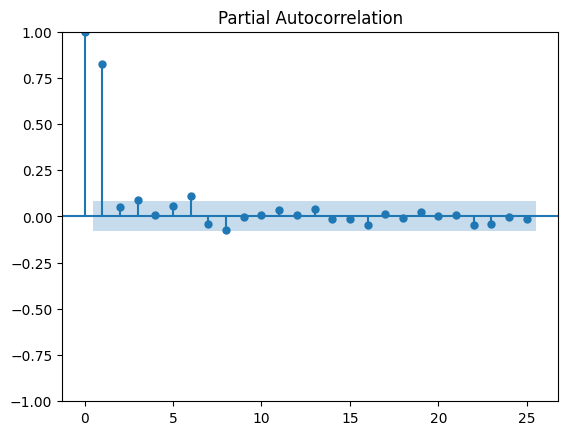

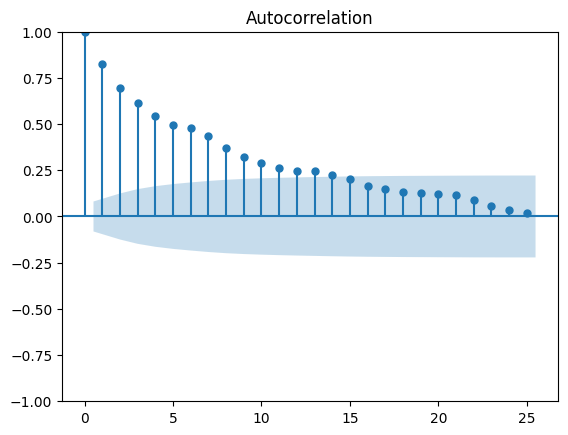

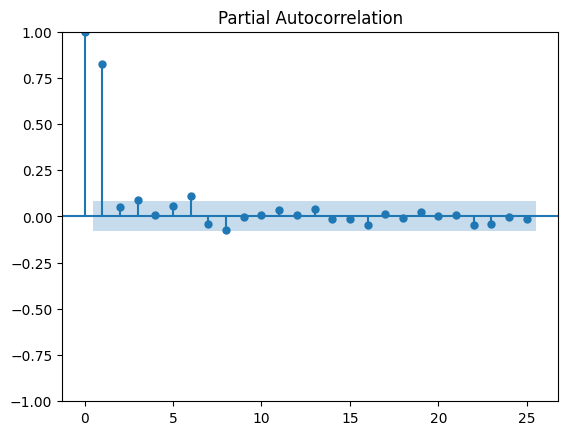

In [21]:
# Visualize autocorrelation using plot_acf
plot_acf(LUZ_GWAP_train, lags=25, alpha=0.05)  # Plot autocorrelation using plot_acf with confidence interval
# Generate a partial autocorrelation plot
plot_pacf(LUZ_GWAP_train, lags=25, alpha=0.05)

In [88]:
#PACF for GWAP cuts off at lag 1; ACF for LWAP cuts off at lag 13
#Auto-Arima: Identification of best orders using AIC
LUZ_GWAP_sarimax = auto_arima(LUZ_GWAP_train, 
                            start_p=0, start_d=0, start_q=0,
                            max_p=1, max_d=2, max_q=13,
                            error_action='warn', trace=True,
                            suppress_warnings=True, stepwise=True,
                            exog=LUZ_diff_exog)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1019.602, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1028.298, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1033.009, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1021.597, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1065.384, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1064.312, Time=0.27 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1048.248, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-1067.240, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-1035.004, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-1030.293, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-1066.236, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-1050.245, Time=1.23 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 2.083 seconds


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



,GWAP
2023-08-08,0.536862
2023-08-09,0.656732
2023-08-10,0.689064
2023-08-11,0.707674
2023-08-12,0.622807
2023-08-13,0.643755
2023-08-14,0.601056
2023-08-15,0.649057
2023-08-16,0.568715
2023-08-17,0.582526


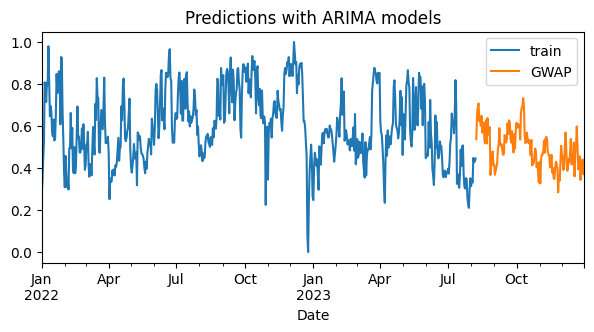

In [118]:
#Using skforecast
luz_gwap_model = Sarimax(order=(1, 1, 1), sm_predict_kwargs={'dynamic': True})
luz_gwap_model.fit(y=LUZ_GWAP_train, exog= LUZ_diff_exog)
luz_gwap_model.summary()

# Prediction
# ==============================================================================
luz_gwap_predictions = luz_gwap_model.predict(steps=len(LUZ_GWAP_test), exog=luz_test_exog)
luz_gwap_predictions.columns = ['GWAP']
display(luz_gwap_predictions.head(10))

#Plot predictions
# ==============================================================================
fig, ax = plt.subplots(figsize=(7, 3))
LUZ_GWAP_train.plot(ax=ax, label='train')
luz_gwap_predictions.plot(ax=ax, label='Predictions')
ax.set_title('Predictions with ARIMA models')
ax.legend()


In [72]:
LUZ_GWAP_forecaster = ForecasterSarimax(LUZ_GWAP_sarimax)
luz_gwap_metric, luz_gwap_predictions = backtesting_sarimax(
                          forecaster            = LUZ_GWAP_forecaster,
                          y                     = LUZ_GWAP,
                          initial_train_size    = len(LUZ_GWAP_train),
                          fixed_train_size      = False,
                          steps=1,
                          metric                = 'mean_absolute_error',
                          refit                 = True,
                          n_jobs                = "auto",
                          suppress_warnings_fit = True,
                          verbose               = True,
                          show_progress         = True
                      )
display(luz_gwap_metric)
luz_gwap_predictions.head(4)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/skforecast/model_selection_sarimax/model_selection_sarimax.py:204: LongTrainingWarning:

The forecaster will be fit 146 times. This can take substantial amounts of time. If not feasible, try with `refit = False`.
 
 You can suppress this warning using: warnings.simplefilter('ignore', category=LongTrainingWarning)



Information of backtesting process
----------------------------------
Number of observations used for initial training: 584
Number of observations used for backtesting: 146
    Number of folds: 146
    Number skipped folds: 0 
    Number of steps per fold: 1
    Number of steps to exclude from the end of each train set before test (gap): 0

Fold: 0
    Training:   2022-01-01 00:00:00 -- 2023-08-07 00:00:00  (n=584)
    Validation: 2023-08-08 00:00:00 -- 2023-08-08 00:00:00  (n=1)
Fold: 1
    Training:   2022-01-01 00:00:00 -- 2023-08-08 00:00:00  (n=585)
    Validation: 2023-08-09 00:00:00 -- 2023-08-09 00:00:00  (n=1)
Fold: 2
    Training:   2022-01-01 00:00:00 -- 2023-08-09 00:00:00  (n=586)
    Validation: 2023-08-10 00:00:00 -- 2023-08-10 00:00:00  (n=1)
Fold: 3
    Training:   2022-01-01 00:00:00 -- 2023-08-10 00:00:00  (n=587)
    Validation: 2023-08-11 00:00:00 -- 2023-08-11 00:00:00  (n=1)
Fold: 4
    Training:   2022-01-01 00:00:00 -- 2023-08-11 00:00:00  (n=588)
    Validatio

100%|██████████| 146/146 [00:05<00:00, 25.08it/s]


,mean_absolute_error
0,1253.043295


,pred
2023-08-08,0.449933
2023-08-09,7961.676352
2023-08-10,7204.527580
2023-08-11,8461.514853


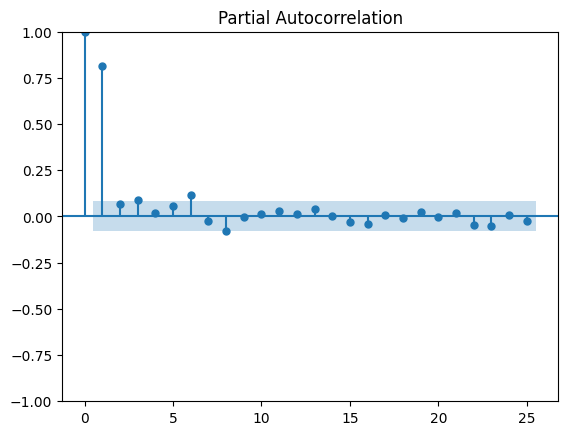

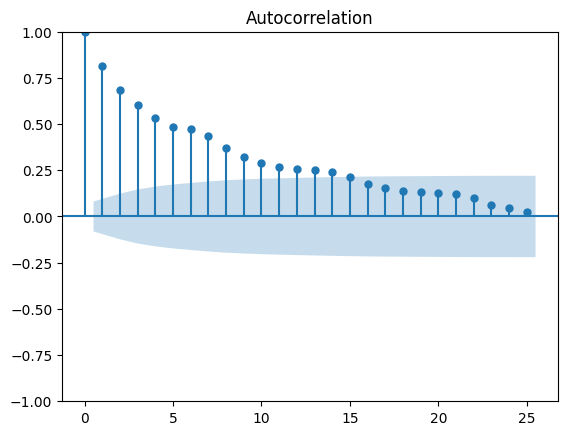

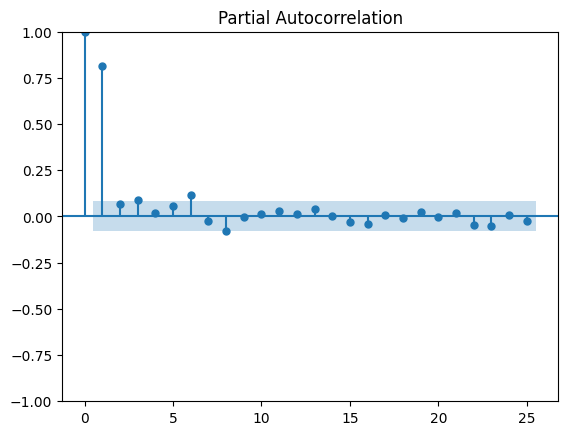

In [37]:
#LUZON LWAP
# Visualize autocorrelation using plot_acf
plot_acf(LUZ_LWAP_train, lags=25, alpha=0.05)  # Plot autocorrelation using plot_acf with confidence interval
# Generate a partial autocorrelation plot
plot_pacf(LUZ_LWAP_train, lags=25, alpha=0.05)

In [89]:
#PACF for LWAP cuts off at lag 1; ACF for LWAP cuts off at lag 14
#Auto-Arima: Identification of best orders using AIC
LUZ_LWAP_sarimax = auto_arima(LUZ_LWAP_train, 
                            start_p=0, start_d=0, start_q=0,
                            max_p=1, max_d=2, max_q=14, 
                            seasonal=False,
                            error_action='warn', trace=True,
                            suppress_warnings=True, stepwise=False,
                            exog=LUZ_diff_exog, iter=1000)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-975.031, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-993.443, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1009.065, Time=0.07 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-1010.857, Time=0.15 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-1013.558, Time=0.24 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=-1018.611, Time=0.42 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-987.165, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1025.669, Time=0.22 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1022.154, Time=0.18 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1017.876, Time=0.25 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-1017.165, Time=0.41 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 2.145 seconds


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



,LWAP
2023-08-08,0.528447
2023-08-09,0.665670
2023-08-10,0.690680
2023-08-11,0.716685
2023-08-12,0.627103
2023-08-13,0.653711
2023-08-14,0.590508
2023-08-15,0.660067
2023-08-16,0.555977
2023-08-17,0.574430


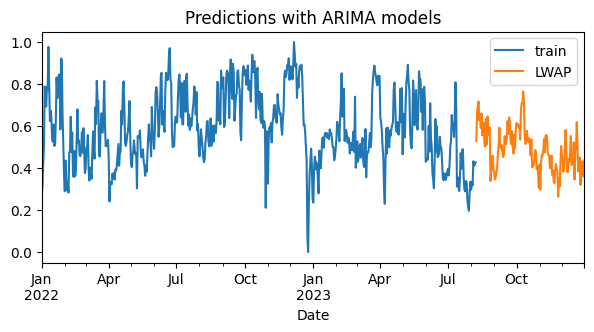

In [108]:
#Using skforecast
luz_model_lwap = Sarimax(order=(1, 1, 1), sm_predict_kwargs={'dynamic': True})
luz_model_lwap.fit(y=LUZ_LWAP_train, exog= LUZ_diff_exog)
luz_model_lwap.summary()

# Prediction
# ==============================================================================
luz_lwap_predictions = luz_model_lwap.predict(steps=len(LUZ_LWAP_test), exog=luz_test_exog)
luz_lwap_predictions.columns = ['LWAP']
display(luz_lwap_predictions.head(10))

#Plot predictions
# ==============================================================================
fig, ax = plt.subplots(figsize=(7, 3))
LUZ_LWAP_train.plot(ax=ax, label='train')
luz_lwap_predictions.plot(ax=ax, label='LWAP Predictions')
ax.set_title('Predictions with ARIMA models')
ax.legend()


In [83]:
print(luz_gwap_model.summary())

                               SARIMAX Results                                
Dep. Variable:                   GWAP   No. Observations:                  584
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 578.980
Date:                Sat, 02 Nov 2024   AIC                          -1073.960
Time:                        22:13:24   BIC                           -890.496
Sample:                    01-01-2022   HQIC                         -1002.449
                         - 08-07-2023                                         
Covariance Type:                  opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
FLOW_LUZ                    0.0261      0.054      0.484      0.628      -0.080       0.132
RESERVE_GWAP_Fr            -0.0873      0.062     -1.411      0.158      -0.208       0.034


In [87]:
print(luz_model_lwap.summary())

                               SARIMAX Results                                
Dep. Variable:                   LWAP   No. Observations:                  584
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 567.433
Date:                Sat, 02 Nov 2024   AIC                          -1050.866
Time:                        22:14:41   BIC                           -867.402
Sample:                    01-01-2022   HQIC                          -979.356
                         - 08-07-2023                                         
Covariance Type:                  opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
FLOW_LUZ                    0.0307      0.052      0.587      0.557      -0.072       0.133
RESERVE_GWAP_Fr            -0.0766      0.061     -1.265      0.206      -0.195       0.042


In [110]:
#Applying the inverse transformations
#Loading inverse transformations for Luzon

luz_minmax_fit_loaded = joblib.load('/Users/jojielyn/Desktop/School/04 Senior/Thesis/SARIMAX/Luzon/minmax_scaler.pkl')
luz_boxcox_fit_loaded = joblib.load('/Users/jojielyn/Desktop/School/04 Senior/Thesis/SARIMAX/Luzon/boxcox_pipeline.pkl')
luz_yeojohnson_fit_loaded = joblib.load('/Users/jojielyn/Desktop/School/04 Senior/Thesis/SARIMAX/Luzon/yeojohnson_pipeline.pkl')
luz_boxcoxy_fit_loaded = joblib.load('/Users/jojielyn/Desktop/School/04 Senior/Thesis/SARIMAX/Luzon/boxcox_pipeliney.pkl')

#Converting 

In [121]:
print(luz_lwap_predictions)

                LWAP
2023-08-08  0.528447
2023-08-09  0.665670
2023-08-10  0.690680
2023-08-11  0.716685
2023-08-12  0.627103
...              ...
2023-12-27  0.401470
2023-12-28  0.432035
2023-12-29  0.368063
2023-12-30  0.359752
2023-12-31  0.434695

[146 rows x 1 columns]


In [122]:
luz_predictions = pd.concat([luz_gwap_predictions, luz_lwap_predictions], axis=1)
luz_predictions_inverse=luz_boxcoxy_fit_loaded.inverse_transform(luz_predictions)
luz_predictions_inverse

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but PowerTransformer was fitted with feature names



array([[ 6421.41623945,  6970.13513017],
       [ 9680.54389855, 11299.28849777],
       [10952.06861528, 12455.96026249],
       [11792.27393254, 13834.22493695],
       [ 8558.30237311,  9782.66200422],
       [ 9228.16427217, 10797.08282296],
       [ 7932.77200279,  8586.49476996],
       [ 9409.33219882, 11060.1672028 ],
       [ 7115.45869161,  7631.6182797 ],
       [ 7449.30948885,  8123.00116665],
       [ 8387.14615841,  9396.27564287],
       [ 6238.96637911,  6639.82770626],
       [ 6047.24247756,  6394.49877935],
       [ 8696.42860288, 10013.55983682],
       [ 6034.63210828,  6603.10396211],
       [ 9019.02216267, 10454.62792129],
       [ 6881.2375591 ,  7622.42854563],
       [ 7344.40657088,  8091.70300127],
       [ 7764.53168373,  8672.47311129],
       [ 3947.17651822,  3984.80196052],
       [ 4421.01582321,  4472.01240519],
       [ 4640.3233464 ,  4729.89681069],
       [ 5388.80455582,  5612.39773599],
       [ 4486.90621666,  4629.08604076],
       [ 4501.03

In [163]:
luz_predictions_inverse_df = pd.DataFrame(luz_predictions_inverse)
luz_predictions_inverse_df.rename(columns={'0': 'GWAP', '1': 'LWAP'}, inplace=True)

LUZ_GWAP_predictions_inverse = pd.DataFrame(luz_predictions_inverse[:, 0], columns=['GWAP'])
LUZ_GWAP_predictions_inverse = pd.concat([test_date,LUZ_GWAP_predictions_inverse], axis=1)
LUZ_GWAP_predictions_inverse.set_index('Date', inplace=True)
LUZ_GWAP_predictions_inverse.index = pd.to_datetime(LUZ_GWAP_predictions_inverse.index)
LUZ_GWAP_predictions_inverse.index.freq='D'
LUZ_GWAP_predictions_inverse = LUZ_GWAP_predictions_inverse.squeeze()

LUZ_LWAP_predictions_inverse = pd.DataFrame(luz_predictions_inverse[:, 0], columns=['LWAP'])
LUZ_LWAP_predictions_inverse = pd.concat([test_date,LUZ_LWAP_predictions_inverse], axis=1)
LUZ_LWAP_predictions_inverse.set_index('Date', inplace=True)
LUZ_LWAP_predictions_inverse.index = pd.to_datetime(LUZ_LWAP_predictions_inverse.index)
LUZ_LWAP_predictions_inverse.index.freq='D'
LUZ_LWAP_predictions_inverse = LUZ_LWAP_predictions_inverse.squeeze()




Mean Absolute Error (MAE) on Test Set: 1444.3974851541047
Root Mean Squared Error (RMSE) on Test Set: 2130.290583970306


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



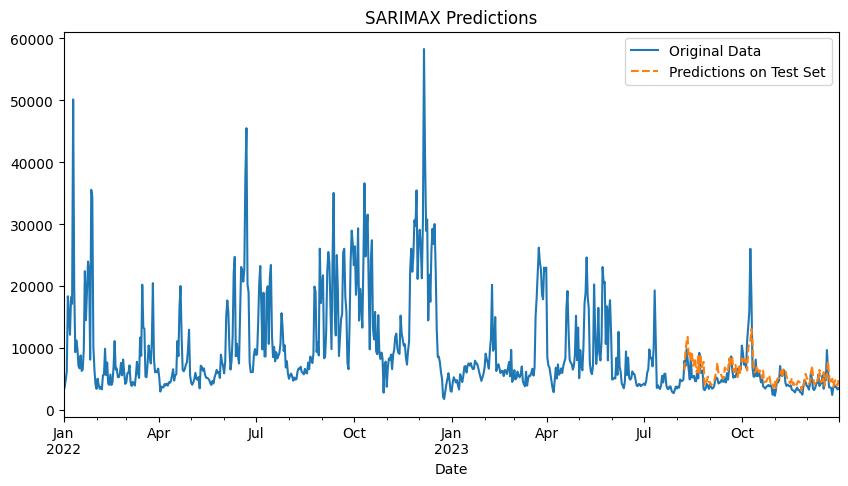

In [205]:
# Calculate MAE for the Luzon GWAP test set
mae_test = mean_absolute_error(LUZ_GWAP_test_inversed, LUZ_GWAP_predictions_inverse)
print(f"Mean Absolute Error (MAE) on Test Set: {mae_test}")

# Calculate MSE for the Luzon GWAP test set
rmse_test = mean_squared_error(LUZ_GWAP_test_inversed, LUZ_GWAP_predictions_inverse, squared=False)
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse_test}")

# Plot predictions
fig, ax = plt.subplots(figsize=(10, 5))
LUZ_GWAP.plot(ax=ax, label='Original Data')
LUZ_GWAP_predictions_inverse.plot(ax=ax, label='Predictions on Test Set', linestyle='--')
ax.set_title('SARIMAX Predictions')
ax.legend()
plt.show()

Mean Absolute Error (MAE) on Test Set: 1385.750049282496
Root Mean Squared Error (RMSE) on Test Set: 2205.1224078166147


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



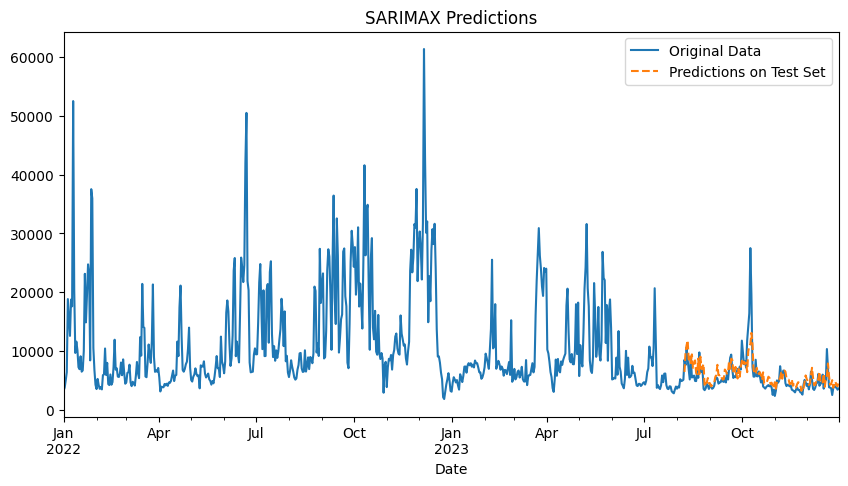

In [206]:
# Calculate MAE for the Luzon LWAP test set
mae_test = mean_absolute_error(LUZ_LWAP_test_inversed, LUZ_LWAP_predictions_inverse)
print(f"Mean Absolute Error (MAE) on Test Set: {mae_test}")

# Calculate MSE for the Luzon LWAP test set
rmse_test = mean_squared_error(LUZ_LWAP_test_inversed, LUZ_LWAP_predictions_inverse, squared=False)
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse_test}")

# Plot predictions
fig, ax = plt.subplots(figsize=(10, 5))
LUZ_LWAP.plot(ax=ax, label='Original Data')
LUZ_LWAP_predictions_inverse.plot(ax=ax, label='Predictions on Test Set', linestyle='--')
ax.set_title('SARIMAX Predictions')
ax.legend()
plt.show()

In [161]:
print(LUZ_GWAP_predictions_inverse)

Date
2023-08-08     6421.416239
2023-08-09     9680.543899
2023-08-10    10952.068615
2023-08-11    11792.273933
2023-08-12     8558.302373
                  ...     
2023-12-27     4413.128168
2023-12-28     4796.598712
2023-12-29     4134.575423
2023-12-30     3982.710511
2023-12-31     4824.748425
Freq: D, Name: GWAP, Length: 146, dtype: float64


In [ ]:
LUZ_GWAP_predictions_inverse = luz_predictions_inverse
LUZ_LWAP_train = pd.concat([train_date,LUZ_LWAP_train], axis=1)
LUZ_LWAP_train.set_index('Date', inplace=True)
LUZ_LWAP_train.index = pd.to_datetime(LUZ_LWAP_train.index)
LUZ_LWAP_train.index.freq='D'
LUZ_LWAP_train = LUZ_LWAP_train.squeeze()


In [125]:
luz_predictions_inverse_df

,0,1
0,6421.416239,6970.135130
1,9680.543899,11299.288498
2,10952.068615,12455.960262
3,11792.273933,13834.224937
4,8558.302373,9782.662004
...,...,...
141,4413.128168,4743.396842
142,4796.598712,5180.109096
143,4134.575423,4320.913732
144,3982.710511,4223.726396


SARIMAX FOR VISAYAS

In [92]:
vis_labels_csv = r'/Users/jojielyn/Desktop/School/04 Senior/Thesis/SARIMAX/Visayas/train_labels_transformed.csv'
vis_data_csv = r'/Users/jojielyn/Desktop/School/04 Senior/Thesis/SARIMAX/Visayas/train_data_transformed.csv'
vis_test_data_csv=r'/Users/jojielyn/Desktop/School/04 Senior/Thesis/SARIMAX/Visayas/test_data.csv'
vis_test_labels_csv=r'/Users/jojielyn/Desktop/School/04 Senior/Thesis/SARIMAX/Visayas/test_labels.csv'
vis_transformed_data=r'/Users/jojielyn/Desktop/School/04 Senior/Thesis/SARIMAX/Visayas/data_transformed.csv'

vis_transformed_train_data = pd.read_csv(vis_data_csv)
vis_transformed_train_labels = pd.read_csv(vis_labels_csv)
vis_transformed_data = pd.read_csv(vis_transformed_data)

vis_test_data = pd.read_csv(vis_test_data_csv)
vis_test_labels = pd.read_csv(vis_test_labels_csv)

In [93]:
#Preparing the dataframes
vis_transformed_train_labels.rename(columns={'0': 'GWAP', '1': 'LWAP'}, inplace=True)
vis_labels_columns = ['GWAP', 'LWAP']
vis_labels_train = pd.DataFrame(vis_transformed_train_labels, columns = labels_columns)
vis_labels_test = pd.DataFrame(vis_test_labels, columns = labels_columns)

vis_transformed_train_data.rename(columns={'0':'GWAP', '1':'LWAP', '2':'FLOW_LUZ','3':'RESERVE_GWAP_Fr','4':'RESERVE_GWAP_Ru','5':'RESERVE_GWAP_Rd','6':'RESERVE_GWAP_Dr','7':'Hourly Demand','8':'RAINFALL_Catbalogan', '9':'TMAX_Catbalogan', '10':'TMIN_Catbalogan','11':'RAINFALL_Roxas City','12':'TMAX_Roxas City','13':'TMIN_Roxas City','14':'RAINFALL_Catarman','15':'TMAX_Catarman','16':'TMIN_Catarman','17':'RAINFALL_Maasin','18':'TMAX_Maasin','19':'TMIN_Maasin','20':'RAINFALL_Dumaguete','21':'TMAX_Dumaguete','22':'TMIN_Dumaguete'}, inplace=True)
LUZ_data_columns = ['GWAP', 'LWAP', 'FLOW_LUZ','RESERVE_GWAP_Fr','RESERVE_GWAP_Ru','RESERVE_GWAP_Rd','RESERVE_GWAP_Dr','Hourly Demand','RAINFALL_Catbalogan','TMAX_Catbalogan','TMIN_Catbalogan','RAINFALL_Roxas City','TMAX_Roxas City','TMIN_Roxas City','RAINFALL_Catarman','TMAX_Catarman','TMIN_Catarman','RAINFALL_Maasin','TMAX_Maasin','TMIN_Maasin','RAINFALL_Dumaguete','TMAX_Dumaguete','TMIN_Dumaguete']
LUZ_data_train = pd.DataFrame(transformed_train_data, columns = LUZ_data_columns)
LUZ_data_test = pd.DataFrame(test_data, columns = LUZ_data_columns)

vis_transformed_data.rename(columns={'0':'GWAP', '1':'LWAP', '2':'FLOW_LUZ','3':'RESERVE_GWAP_Fr','4':'RESERVE_GWAP_Ru','5':'RESERVE_GWAP_Rd','6':'RESERVE_GWAP_Dr','7':'Hourly Demand','8':'RAINFALL_Catbalogan', '9':'TMAX_Catbalogan', '10':'TMIN_Catbalogan','11':'RAINFALL_Roxas City','12':'TMAX_Roxas City','13':'TMIN_Roxas City','14':'RAINFALL_Catarman','15':'TMAX_Catarman','16':'TMIN_Catarman','17':'RAINFALL_Maasin','18':'TMAX_Maasin','19':'TMIN_Maasin','20':'RAINFALL_Dumaguete','21':'TMAX_Dumaguete','22':'TMIN_Dumaguete'}, inplace=True)


In [94]:
#lagging the transformed data
vis_transformed_data = vis_transformed_data.shift(1)
vis_transformed_data = vis_transformed_data.fillna(0)

#Removing GWAP and LWAP
vis_transformed_exog = vis_transformed_data.drop(columns=['GWAP','LWAP'])

#Preparing the exog datasets
vis_train_exog = vis_transformed_exog[:train_size]
vis_test_exog = vis_transformed_exog[train_size:]

In [95]:
#Preparing GWAP datasets
VIS_GWAP_train = vis_labels_train['GWAP']
VIS_GWAP_train = pd.concat([train_date,VIS_GWAP_train], axis=1)
VIS_GWAP_train.set_index('Date', inplace=True)
VIS_GWAP_train.index = pd.to_datetime(VIS_GWAP_train.index)
VIS_GWAP_train.index.freq='D'
VIS_GWAP_train = VIS_GWAP_train.squeeze()


VIS_GWAP_test = vis_labels_test['GWAP']
VIS_GWAP_test = pd.concat([test_date,VIS_GWAP_test], axis=1)
VIS_GWAP_test.set_index('Date', inplace=True)
VIS_GWAP_test.index = pd.to_datetime(VIS_GWAP_test.index)
VIS_GWAP_test.index.freq='D'
VIS_GWAP_test = VIS_GWAP_test.squeeze()

VIS_GWAP = pd.concat([VIS_GWAP_train, VIS_GWAP_test], ignore_index=False)


#Preparing the LWAP datasets
VIS_LWAP_train = vis_labels_train['LWAP']
VIS_LWAP_train = pd.concat([train_date,VIS_LWAP_train], axis=1)
VIS_LWAP_train.set_index('Date', inplace=True)
VIS_LWAP_train.index = pd.to_datetime(VIS_LWAP_train.index)
VIS_LWAP_train.index.freq='D'
VIS_LWAP_train = VIS_LWAP_train.squeeze()


VIS_LWAP_test = vis_labels_test['LWAP']
VIS_LWAP_test = pd.concat([test_date,VIS_LWAP_test], axis=1)
VIS_LWAP_test.set_index('Date', inplace=True)
VIS_LWAP_test.index = pd.to_datetime(VIS_LWAP_test.index)
VIS_LWAP_test.index.freq='D'
VIS_LWAP_test = VIS_LWAP_test.squeeze()

#Preparing the exogenous datasets
VIS_exog_train = pd.concat([train_date,vis_train_exog], axis=1)
VIS_exog_train.set_index('Date', inplace=True)

VIS_exog_test = pd.concat([test_date,vis_test_exog], axis=1)
VIS_exog_test.set_index('Date', inplace=True)

In [96]:
#Plotting Train LWAP ang GWAP
# Create the line plot
vis_gwap_plot = px.line(VIS_GWAP_train, x=VIS_GWAP_train.index, y='GWAP')
vis_lwap_plot = px.line(VIS_LWAP_train, x=VIS_LWAP_train.index, y='LWAP')
# Set the title using the ticker value
vis_gwap_plot.update_layout(title=f"Visayas GWAP")
vis_lwap_plot.update_layout(title=f"Visayas LWAP")
# Display the plot
vis_gwap_plot.show()
vis_lwap_plot.show()

In [97]:
#Checking for stationarity in GWAP data
perform_differencing(VIS_GWAP_train)
perform_differencing(VIS_LWAP_train)

VIS_diff_exog = perform_df_differencing(vis_train_exog)
VIS_diff_exog = VIS_diff_exog.fillna(0)

Data is stationary after differencing 0 times.
Data is stationary after differencing 0 times.
Column 'FLOW_LUZ' is stationary after differencing 1 times.
Column 'RESERVE_GWAP_Fr' is stationary after differencing 1 times.
Column 'RESERVE_GWAP_Ru' is stationary after differencing 1 times.
Column 'RESERVE_GWAP_Rd' is stationary after differencing 1 times.
Column 'RESERVE_GWAP_Dr' is stationary after differencing 1 times.


/var/folders/r2/vst9rfjd3ps2_vb675mrrrrw0000gn/T/ipykernel_45685/2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/var/folders/r2/vst9rfjd3ps2_vb675mrrrrw0000gn/T/ipykernel_45685/2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


/var/folders/r2/vst9rfjd3ps2_vb675mrrrrw0000gn/T/ipykernel_45685/2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/var/folders/r2/vst9rfjd3ps2_vb675mrrrrw0000gn/T/ipykernel_45685/2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value retu

Column 'Hourly Demand' is stationary after differencing 1 times.
Column 'RAINFALL_Catbalogan' is stationary after differencing 1 times.
Column 'TMAX_Catbalogan' is stationary after differencing 0 times.
Column 'TMIN_Catbalogan' is stationary after differencing 0 times.
Column 'RAINFALL_Roxas City' is stationary after differencing 0 times.
Column 'TMAX_Roxas City' is stationary after differencing 1 times.
Column 'TMIN_Roxas City' is stationary after differencing 0 times.
Column 'RAINFALL_Catarman' is stationary after differencing 1 times.
Column 'TMAX_Catarman' is stationary after differencing 1 times.


/var/folders/r2/vst9rfjd3ps2_vb675mrrrrw0000gn/T/ipykernel_45685/2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/var/folders/r2/vst9rfjd3ps2_vb675mrrrrw0000gn/T/ipykernel_45685/2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


/var/folders/r2/vst9rfjd3ps2_vb675mrrrrw0000gn/T/ipykernel_45685/2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/var/folders/r2/vst9rfjd3ps2_vb675mrrrrw0000gn/T/ipykernel_45685/2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value retu

Column 'TMIN_Catarman' is stationary after differencing 1 times.
Column 'RAINFALL_Maasin' is stationary after differencing 1 times.
Column 'TMAX_Maasin' is stationary after differencing 0 times.
Column 'TMIN_Maasin' is stationary after differencing 0 times.
Column 'RAINFALL_Dumaguete' is stationary after differencing 0 times.
Column 'TMAX_Dumaguete' is stationary after differencing 0 times.
Column 'TMIN_Dumaguete' is stationary after differencing 0 times.


/var/folders/r2/vst9rfjd3ps2_vb675mrrrrw0000gn/T/ipykernel_45685/2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/var/folders/r2/vst9rfjd3ps2_vb675mrrrrw0000gn/T/ipykernel_45685/2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


/var/folders/r2/vst9rfjd3ps2_vb675mrrrrw0000gn/T/ipykernel_45685/2411308064.py:37: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




In [98]:
VIS_diff_exog = pd.concat([train_date,VIS_diff_exog], axis=1)
VIS_diff_exog.set_index('Date', inplace=True)

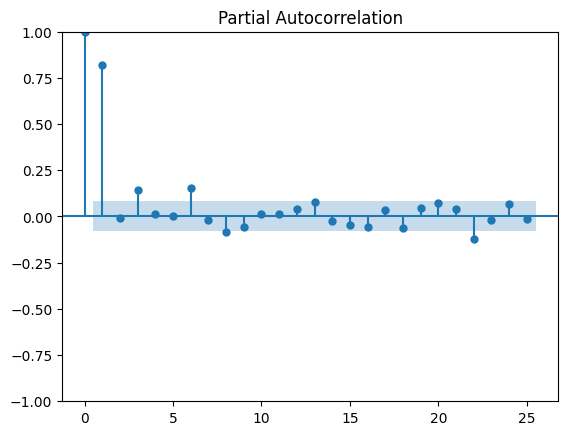

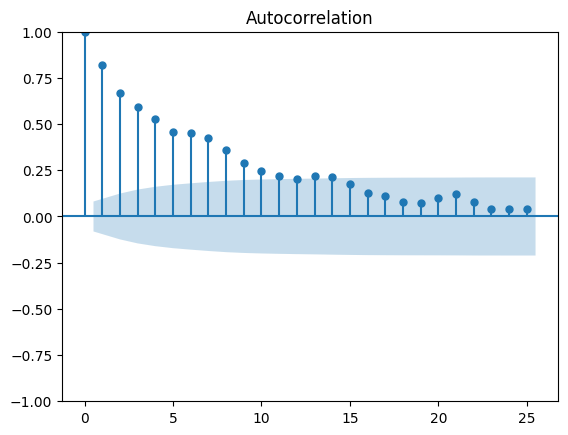

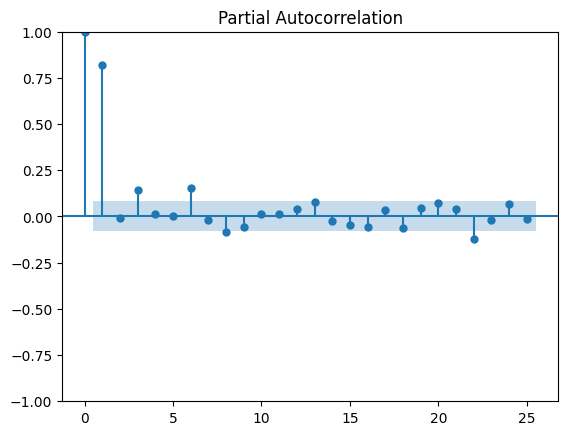

In [99]:
# Visualize autocorrelation using plot_acf
plot_acf(VIS_GWAP_train, lags=25, alpha=0.05)  # Plot autocorrelation using plot_acf with confidence interval
# Generate a partial autocorrelation plot
plot_pacf(VIS_GWAP_train, lags=25, alpha=0.05)

In [101]:
#PACF for GWAP cuts off at lag 1; ACF for LWAP cuts off at lag 10
#Auto-Arima: Identification of best orders using AIC
VIS_GWAP_sarimax = auto_arima(VIS_GWAP_train, 
                            start_p=0, start_d=0, start_q=0,
                            max_p=1, max_d=2, max_q=10,
                            error_action='warn', trace=True,
                            suppress_warnings=True, stepwise=True,
                            exog=VIS_diff_exog)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1261.984, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1264.666, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1267.994, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1263.918, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1301.258, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1299.412, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1296.066, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-1303.168, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-1269.903, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-1266.588, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-1301.272, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-1297.932, Time=0.05 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 0.784 seconds


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



,GWAP
2023-08-08,0.580043
2023-08-09,0.677591
2023-08-10,0.652174
2023-08-11,0.703848
2023-08-12,0.679384
2023-08-13,0.634557
2023-08-14,0.546373
2023-08-15,0.662355
2023-08-16,0.584127
2023-08-17,0.582402


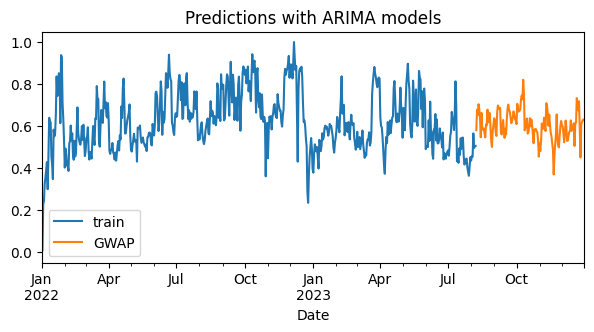

In [102]:
#Using skforecast
vis_gwap_model = Sarimax(order=(1, 1, 1))
vis_gwap_model.fit(y=VIS_GWAP_train, exog= VIS_diff_exog)
vis_gwap_model.summary()

# Prediction
# ==============================================================================
vis_gwap_predictions = vis_gwap_model.predict(steps=len(VIS_GWAP_test), exog=vis_test_exog)
vis_gwap_predictions.columns = ['GWAP']
display(vis_gwap_predictions.head(10))

#Plot predictions
# ==============================================================================
fig, ax = plt.subplots(figsize=(7, 3))
VIS_GWAP_train.plot(ax=ax, label='train')
vis_gwap_predictions.plot(ax=ax, label='Predictions')
ax.set_title('Predictions with ARIMA models')
ax.legend()


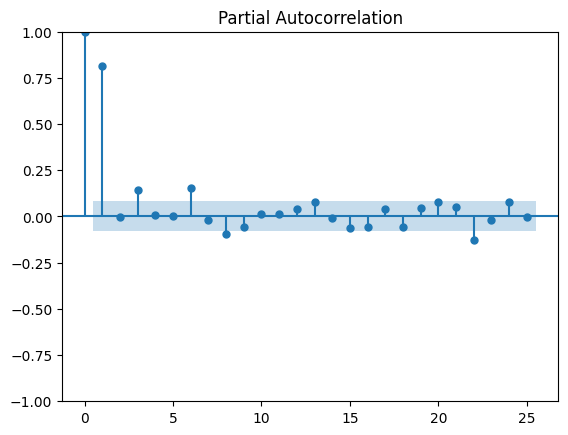

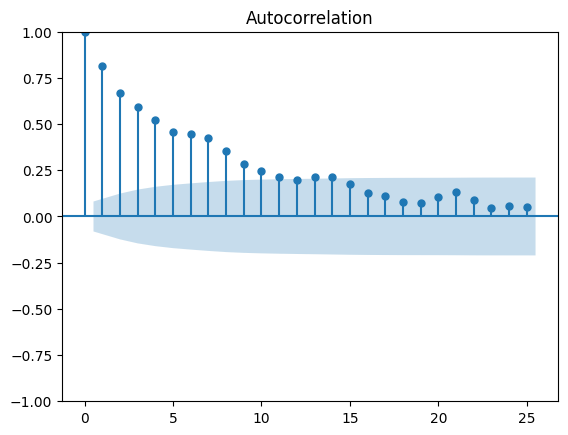

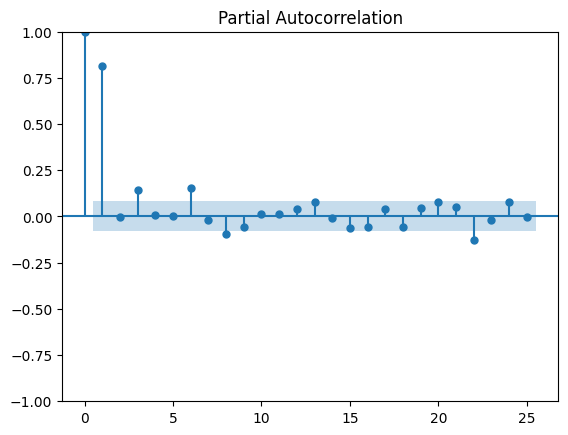

In [103]:
# Visualize autocorrelation using plot_acf
plot_acf(VIS_LWAP_train, lags=25, alpha=0.05)  # Plot autocorrelation using plot_acf with confidence interval
# Generate a partial autocorrelation plot
plot_pacf(VIS_LWAP_train, lags=25, alpha=0.05)

In [104]:
#PACF for GWAP cuts off at lag 1; ACF for LWAP cuts off at lag 10
#Auto-Arima: Identification of best orders using AIC
VIS_LWAP_sarimax = auto_arima(VIS_LWAP_train, 
                            start_p=0, start_d=0, start_q=0,
                            max_p=1, max_d=2, max_q=10,
                            error_action='warn', trace=True,
                            suppress_warnings=True, stepwise=True,
                            exog=VIS_diff_exog)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1156.763, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1160.510, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1164.534, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1158.713, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1200.212, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1196.642, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1192.481, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-1202.105, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-1166.462, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-1162.450, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-1198.519, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-1194.371, Time=0.04 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 0.939 seconds


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



,LWAP
2023-08-08,0.569380
2023-08-09,0.583160
2023-08-10,0.572709
2023-08-11,0.566963
2023-08-12,0.561574
2023-08-13,0.548709
2023-08-14,0.557785
2023-08-15,0.535236
2023-08-16,0.555669
2023-08-17,0.545754


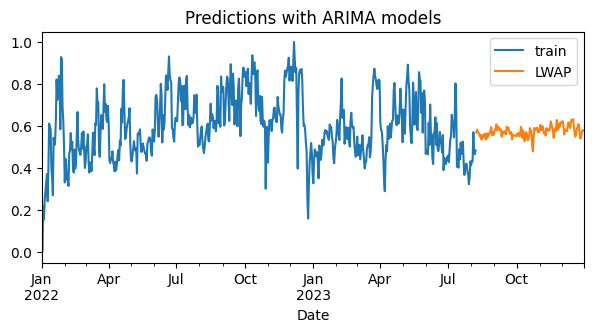

In [106]:
#Using skforecast
vis_lwap_model = Sarimax(order=(1, 1, 1))
vis_lwap_model.fit(y=VIS_LWAP_train, exog= VIS_diff_exog)
vis_lwap_model.summary()

# Prediction
# ==============================================================================
vis_lwap_predictions = vis_lwap_model.predict(steps=len(VIS_LWAP_test), exog=vis_test_exog)
vis_lwap_predictions.columns = ['LWAP']
display(vis_lwap_predictions.head(10))

#Plot predictions
# ==============================================================================
fig, ax = plt.subplots(figsize=(7, 3))
VIS_LWAP_train.plot(ax=ax, label='train')
vis_lwap_predictions.plot(ax=ax, label='Predictions')
ax.set_title('Predictions with ARIMA models')
ax.legend()